# TP Motion estimation

In [2]:
print('Hello Jupyter!')

Hello Jupyter!


In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import ndimage
from scipy import signal
from pylab import *

In [4]:
plt.close('all')

In [5]:
# Fix the regularization parameter
Smoothp = 10

In [6]:
# fix the iteration number
nbiter = 50

In [7]:
def hsf(im1,im2,Smoothp,nbiter):
  print("Hello from a function")
  height, width = im1.shape
  s="Width=" + repr(width) + ", height=" + repr(height)
  print(s)
  s="Min=" + repr(im1.min()) + ", Max=" + repr(im1.max()) + ", Mean=" + repr(im1.mean())
  print(s)
  #Initialize velocity components (u,v) to zero
  u = np.zeros((height, width))
  v = np.zeros((height, width))
  #Convolution masks to compute gradient estimates
  mask_dx = np.array([[0, 0, 0], [0, -1, 1], [0, -1, 1]])/4
  mask_dy = np.array([[0, 0, 0], [0, -1, -1], [0, 1, 1]])/4
  mask_dt = np.array([[0, 0, 0], [0, 1, 1], [0, 1, 1]])/4
  type(mask_dx)
  print(mask_dy)
  #Compute spatial and temporal gradients
  Ix = signal.convolve2d(im1, mask_dx, boundary='symm', mode='same') + signal.convolve2d(im2, mask_dx, boundary='symm', mode='same')
  Iy = signal.convolve2d(im1, mask_dy, boundary='symm', mode='same') + signal.convolve2d(im2, mask_dy, boundary='symm', mode='same')
  It = signal.convolve2d(im1, mask_dt, boundary='symm', mode='same') + signal.convolve2d(im2, mask_dt, boundary='symm', mode='same')
  fig = plt.figure()
  ax = fig.add_subplot(1, 3, 1)
  imgplot = plt.imshow(Ix,cmap="gray")
  ax.set_title('Ix')
  ax = fig.add_subplot(1, 3, 2)
  imgplot = plt.imshow(Iy,cmap="gray")
  ax.set_title('Iy')
  ax = fig.add_subplot(1, 3, 3)
  imgplot = plt.imshow(It,cmap="gray")
  ax.set_title('It')
  plt.show()
    
  #Averaging operator for u and v
  mask_moy=np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])/6+np.array([[1, 0, 1], [0, 0, 0], [1, 0, 1]])/12;
    
  #Iteratively compute the velocity components
  denom=3*Smoothp**2+ np.square(Ix)+ np.square(Iy)
  for i in range(nbiter):
    u_moy=signal.convolve2d(u, mask_moy, boundary='symm', mode='same')
    v_moy=signal.convolve2d(v, mask_moy, boundary='symm', mode='same')
    u=u_moy-np.divide(np.multiply(Ix,(np.multiply(Ix,u_moy)+np.multiply(Iy,v_moy)+It)),denom)
    v=v_moy-np.divide(np.multiply(Iy,(np.multiply(Ix,u_moy)+np.multiply(Iy,v_moy)+It)),denom)

    #Calcul des derivee de u et v
    ux=signal.convolve2d(u, mask_dx, boundary='symm', mode='same')
    uy=signal.convolve2d(u, mask_dy, boundary='symm', mode='same')
    vx=signal.convolve2d(v, mask_dx, boundary='symm', mode='same')
    vy=signal.convolve2d(v, mask_dy, boundary='symm', mode='same')
    
    return u,v;

In [8]:
##### Read images #####
try: 
    im1 = mpimg.imread("../../Data/taxi/taxi1.png")
except IOError:
    pass
 
try: 
     im2 = mpimg.imread("../../Data/taxi/taxi2.png")
except IOError:
    pass

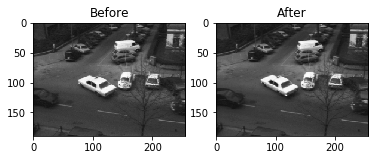

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(im1,cmap="gray")
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(im2,cmap="gray")
ax.set_title('After')
plt.show()

In [10]:
height, width = im1.shape
s="Width=" + repr(width) + ", height=" + repr(height)
print(s)
s="Min=" + repr(im1.min()) + ", Max=" + repr(im1.max()) + ", Mean=" + repr(im1.mean())
print(s)

Width=256, height=190
Min=0.050980393, Max=0.98039216, Mean=0.30353734


Call to the function for the computation of velocity component 

Hello from a function
Width=256, height=190
Min=0.050980393, Max=0.98039216, Mean=0.30353734
[[ 0.    0.    0.  ]
 [ 0.   -0.25 -0.25]
 [ 0.    0.25  0.25]]


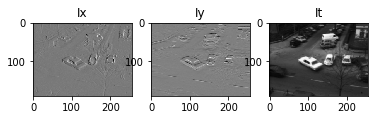

In [11]:
u,v=hsf(im1,im2,Smoothp,nbiter)

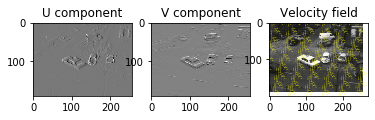

In [26]:
#Display Velocity field
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(u,cmap="gray")
ax.set_title('U component')
ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(v,cmap="gray")
ax.set_title('V component')
ax = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(im1,cmap="gray")
dp=40
x,y = np.meshgrid(np.linspace(0,height,dp),np.linspace(0,width,dp))
plt.quiver(y,x,v[0:height:dp,0:width:dp],u[0:height:dp,0:width:dp],color = 'yellow')
ax.set_title('Velocity field')
plt.show()

In [29]:
y

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  6.56410256,   6.56410256,   6.56410256, ...,   6.56410256,
          6.56410256,   6.56410256],
       [ 13.12820513,  13.12820513,  13.12820513, ...,  13.12820513,
         13.12820513,  13.12820513],
       ...,
       [242.87179487, 242.87179487, 242.87179487, ..., 242.87179487,
        242.87179487, 242.87179487],
       [249.43589744, 249.43589744, 249.43589744, ..., 249.43589744,
        249.43589744, 249.43589744],
       [256.        , 256.        , 256.        , ..., 256.        ,
        256.        , 256.        ]])